In [82]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [83]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [84]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    # CS = plt.contour(X, Y, Z, V, colors=colors)
    # plt.clabel(CS, inline=1, fontsize=10)
    CS = plt.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over`nepochs`epochs.  

In [85]:
def optimize(f, x, nepochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [86]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


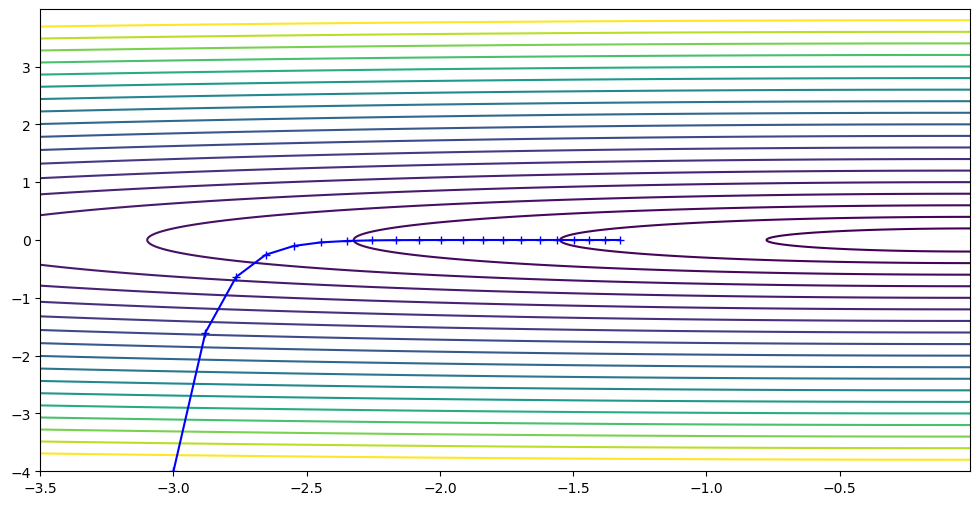

In [87]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.SGD([x],lr=.3)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

plt.plot(xhist,yhist,"b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist,yhist))


### Tasks 

For better comparison, always use the same (non-optimal) initial point (-3,-4).

* Study SGD for different learning rates. Illustrate the behavior as learned and analysed in week 02.
* Compare Momentum for different momentum parameters ($\beta_1$) and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov?
* Compare RMSProp for different parameters $\beta_2$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Identify your best parameters that allows you to get closest the minimum in 25 epochs and with an error of at max 1.0e-3?


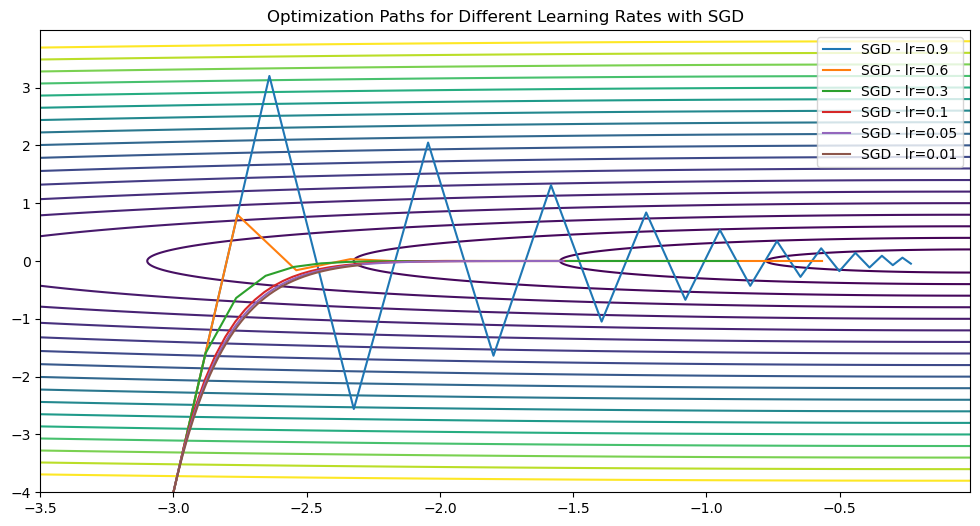

In [88]:
# SGD for Different Learning Rates

learning_rates = [0.9, 0.6, 0.3, 0.1, 0.05, 0.01]
nepochs = [20, 20, 30, 50, 100, 200]

plt.figure(figsize=(12, 6))

plot_contours([-3.5, 0., -4., 4.], 4., test_function)

for idx, lr in enumerate(learning_rates):
    x = torch.tensor([-3.0, -4.0], requires_grad=True)
    optimizer = torch.optim.SGD([x], lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs[idx], optimizer)
    plt.plot(xhist, yhist, label=f"SGD - lr={lr}")

plt.legend()
plt.title("Optimization Paths for Different Learning Rates with SGD")
plt.show()

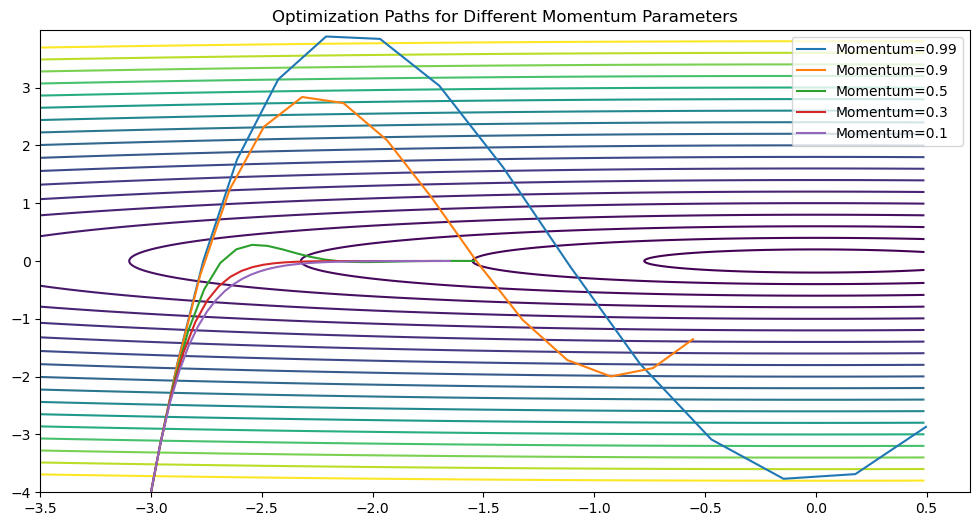

In [89]:
# Momentum Comparison for Different Momentum Parameters

plt.figure(figsize=(12, 6))

plot_contours([-3.5, 0.5, -4., 4.], 4., test_function)
momentum_values = [0.99, 0.9, 0.5, 0.3, 0.1]
nepochs = [15, 15, 25, 30, 40]

for idx, momentum in enumerate(momentum_values):
    x = torch.tensor([-3.0, -4.0], requires_grad=True)
    optimizer = torch.optim.SGD([x], lr=0.1, momentum=momentum)
    xhist, yhist = optimize(test_function, x, nepochs[idx], optimizer)
    plt.plot(xhist, yhist, label=f"Momentum={momentum}")

plt.legend()
plt.title("Optimization Paths for Different Momentum Parameters")
plt.show()


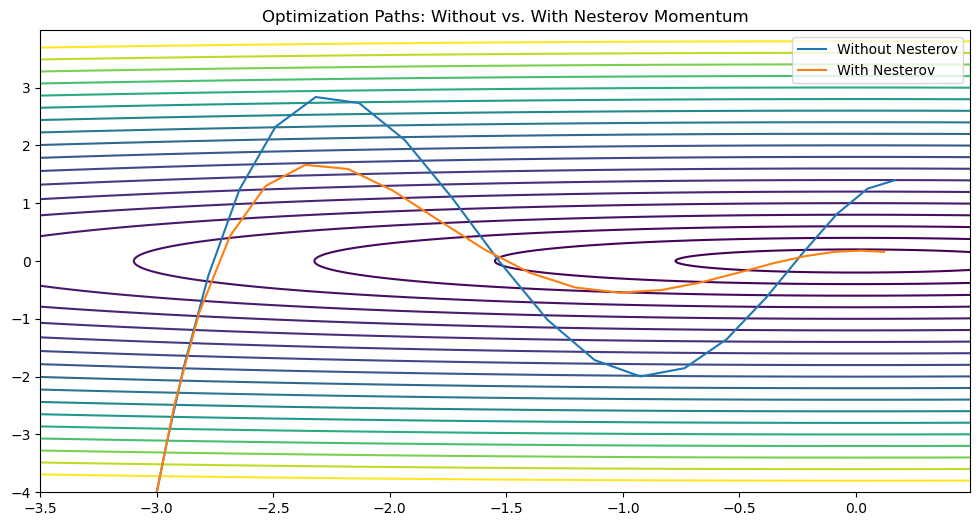

In [90]:
# Difference with / without Nesterov Momentum

nepochs = 20
plt.figure(figsize=(12, 6))

plot_contours([-3.5, 0.5, -4., 4.], 4., test_function)
momentum = 0.9

# Without Nesterov
x = torch.tensor([-3.0, -4.0], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.1, momentum=momentum, nesterov=False)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)
plt.plot(xhist, yhist, label="Without Nesterov")

# With Nesterov
x = torch.tensor([-3.0, -4.0], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.1, momentum=momentum, nesterov=True)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)
plt.plot(xhist, yhist, label="With Nesterov")

plt.legend()
plt.title("Optimization Paths: Without vs. With Nesterov Momentum")
plt.show()

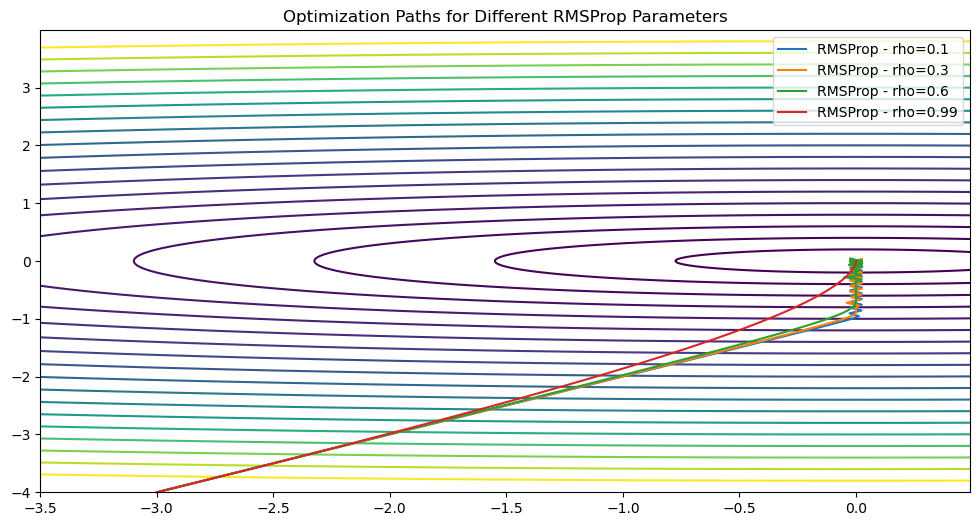

In [91]:
# RMSProp for Different Parameters

rho_values = [0.1, 0.3, 0.6, 0.99] 
learning_rate = 0.05
nepochs = 100

plt.figure(figsize=(12, 6))

plot_contours([-3.5, 0.5, -4., 4.], 4., test_function)

for rho in rho_values:
    x = torch.tensor([-3.0, -4.0], requires_grad=True)
    optimizer = torch.optim.RMSprop([x], lr=learning_rate, alpha=rho)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)
    plt.plot(xhist, yhist, label=f"RMSProp - rho={rho}")

plt.legend()
plt.title("Optimization Paths for Different RMSProp Parameters")
plt.show()


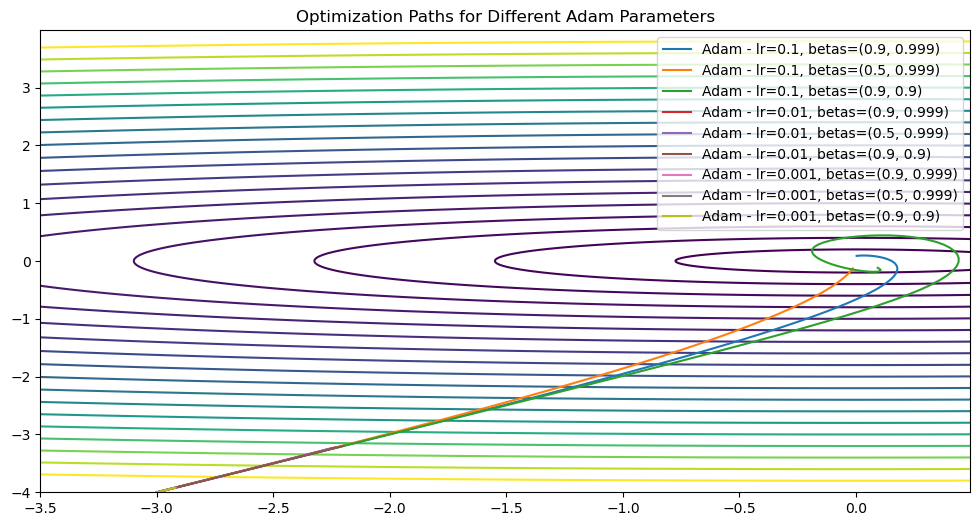

(0.1, (0.9, 0.999)) 0.088


In [92]:
# Different Settings for Adam Optimizer

nepochs = 80

learning_rates_adam = [0.1, 0.01, 0.001]
betas_adam = [(0.9, 0.999), (0.5, 0.999), (0.9, 0.9)]

plt.figure(figsize=(12, 6))

plot_contours([-3.5, 0.5, -4., 4.], 4., test_function)

best_params = None
best_error = np.inf

for lr in learning_rates_adam:
    for beta in betas_adam:
        x = torch.tensor([-3.0, -4.0], requires_grad=True)
        optimizer = torch.optim.Adam([x], lr=lr, betas=beta)
        xhist, yhist = optimize(test_function, x, nepochs, optimizer)
        plt.plot(xhist, yhist, label=f"Adam - lr={lr}, betas={beta}")

        final_error = float(error(xhist, yhist).split(',')[0])
        if final_error < best_error:
            best_error = final_error
            best_params = (lr, beta)

plt.legend()
plt.title("Optimization Paths for Different Adam Parameters")
plt.show()

print(best_params, best_error)